⬆️ Upload your olist_merged_filtered.csv file:


Saving olist_merged_filtered.csv to olist_merged_filtered (1).csv


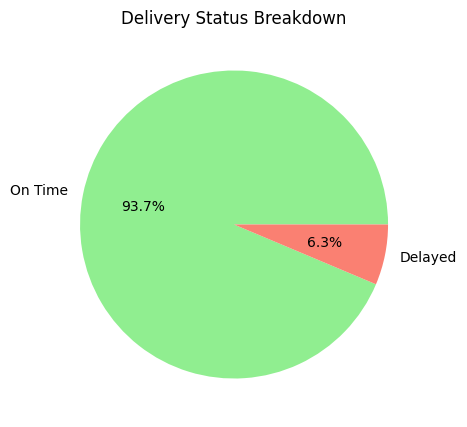

<ipython-input-11-2a7cae2dc93e>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='Reds_r')


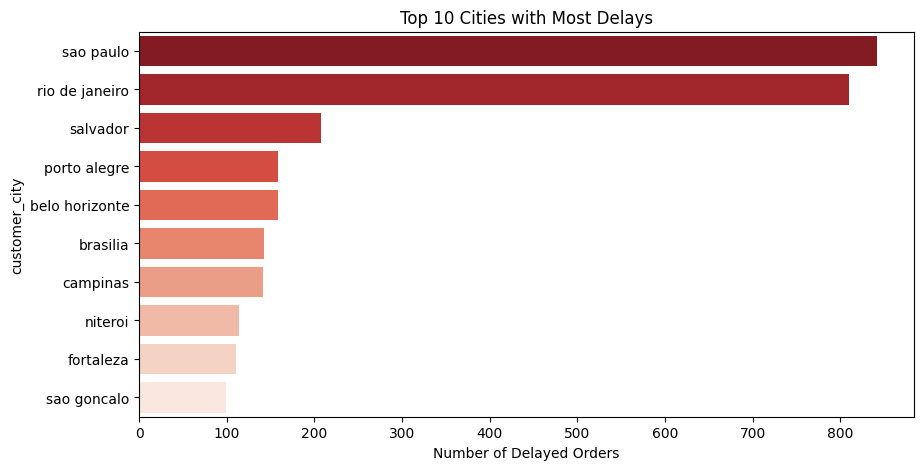

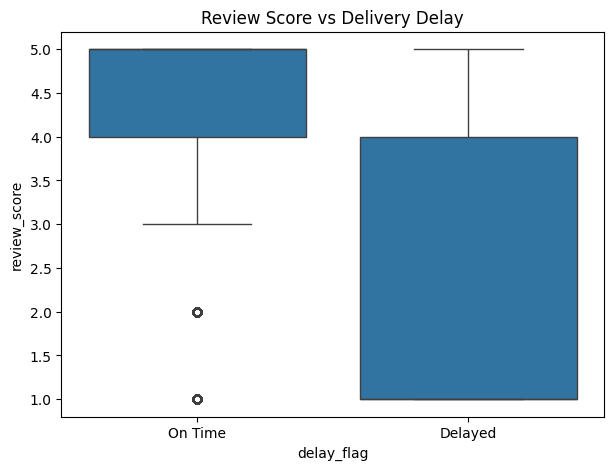

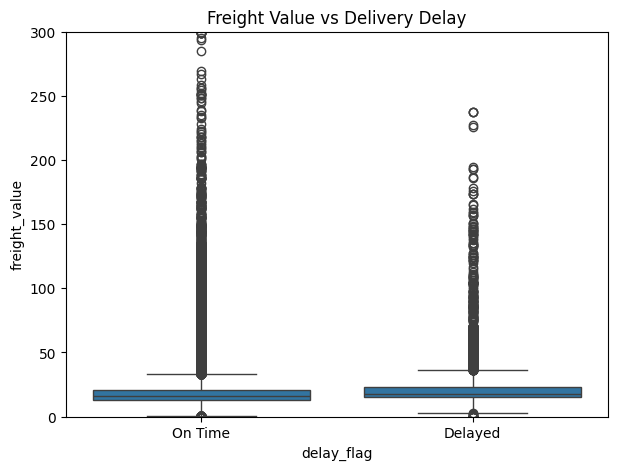

📘 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     21522
           1       0.83      0.62      0.71      1450

    accuracy                           0.97     22972
   macro avg       0.90      0.81      0.85     22972
weighted avg       0.97      0.97      0.97     22972



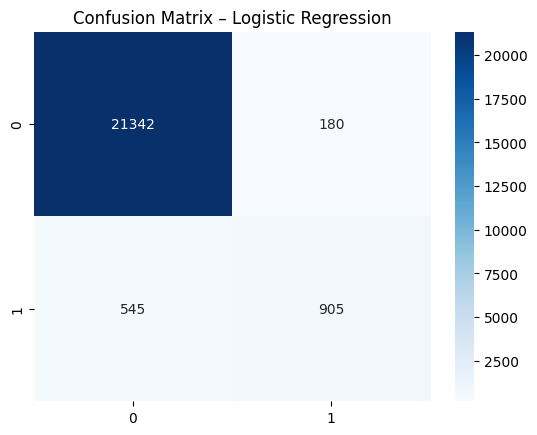

🌲 Random Forest Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     21522
           1       0.85      0.75      0.80      1450

    accuracy                           0.98     22972
   macro avg       0.92      0.87      0.89     22972
weighted avg       0.97      0.98      0.98     22972



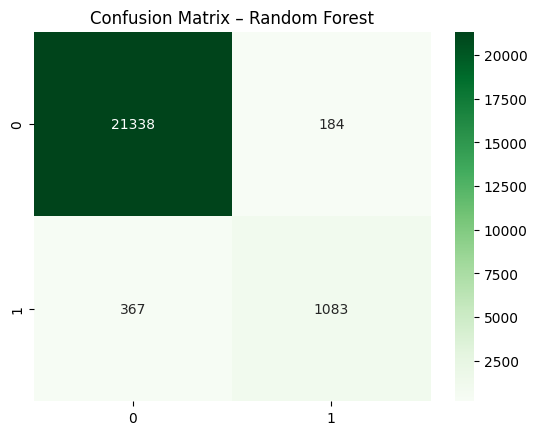

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# 📦 1. Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import os
import shutil

# 📤 2. Tải file từ máy
print("⬆️ Upload your olist_merged_filtered.csv file:")
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)

# 📂 3. Tạo thư mục lưu ảnh
os.makedirs("img", exist_ok=True)

# 📊 4. EDA – Visualizations
# Tỷ lệ đơn hàng trễ
plt.figure(figsize=(5,5))
df['delay_flag'].value_counts().plot.pie(labels=['On Time', 'Delayed'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title("Delivery Status Breakdown")
plt.ylabel('')
plt.savefig('img/delay_pie.png')
plt.show()

# Thành phố khách hàng trễ nhiều nhất
top_cities = df[df['delay_flag'] == 1]['customer_city'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='Reds_r')
plt.title("Top 10 Cities with Most Delays")
plt.xlabel("Number of Delayed Orders")
plt.savefig('img/top_delayed_cities.png')
plt.show()

# Review Score vs Delay Flag
plt.figure(figsize=(7,5))
sns.boxplot(x='delay_flag', y='review_score', data=df)
plt.title("Review Score vs Delivery Delay")
plt.xticks([0,1], ['On Time', 'Delayed'])
plt.savefig('img/review_vs_delay.png')
plt.show()

# Freight value vs Delay
plt.figure(figsize=(7,5))
sns.boxplot(x='delay_flag', y='freight_value', data=df)
plt.title("Freight Value vs Delivery Delay")
plt.xticks([0,1], ['On Time', 'Delayed'])
plt.ylim(0, 300)
plt.savefig('img/freight_vs_delay.png')
plt.show()
# 🎯 5. Chuẩn bị dữ liệu cho ML
df_model = df.copy()

# Chuyển các cột phân loại về số
le = LabelEncoder()
for col in ['customer_state', 'seller_state', 'payment_type']:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

# Xử lý missing
df_model = df_model.dropna(subset=['delivery_duration', 'freight_value', 'review_score', 'payment_value'])

# Biến đầu vào và target
features = ['customer_state', 'seller_state', 'freight_value', 'payment_value', 'review_score', 'delivery_duration']
X = df_model[features]
y = df_model['delay_flag']

# Tách train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# 🤖 mô hình 1 : Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("📘 Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.savefig('img/conf_matrix_lr.png')
plt.show()




# 🌳mô hình 2 : Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🌲 Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Random Forest")
plt.savefig('img/conf_matrix_rf.png')
plt.show()

#nén ảnh và tải về
shutil.make_archive('olist_analysis_img', 'zip', 'img')
files.download('olist_analysis_img.zip')
